## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [60]:
from keras.layers import BatchNormalization
"""Code Here
    建立你的神經網路
    """
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i,n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        
        else:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [61]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [62]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE,nesterov=True,momentum=MOMENTUM)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)

model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),shuffle=True)

train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
train_acc = model.history.history['acc']
valid_acc = model.history.history['acc']

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_77 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_78 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_79 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 9s 172us/step - loss: 0.1793 - acc: 0.9499 - val_loss: 2.5121 - val_acc: 0.4622
Epoch 50/50
50000/50000 [==============================] - 9s 178us/step - loss: 0.1756 - acc: 0.9506 - val_loss: 2.3498 - val_acc: 0.4829


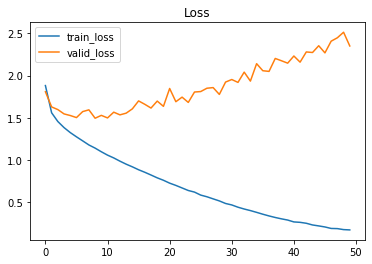

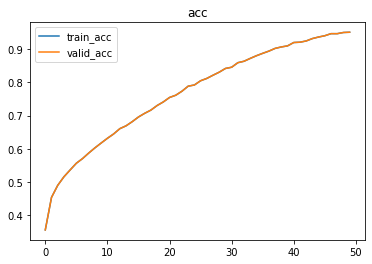

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

plt.plot(range(len(train_loss)),train_loss,label='train_loss')
plt.plot(range(len(valid_loss)),valid_loss,label='valid_loss')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)),train_acc,label='train_acc')
plt.plot(range(len(valid_acc)),valid_acc,label='valid_acc')
plt.legend()
plt.title("acc")
plt.show()


In [65]:
from keras.layers import BatchNormalization
"""Code Here
    建立你的神經網路
    """
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i,n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
            
        
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
           
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [66]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [67]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE,nesterov=True,momentum=MOMENTUM)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)

model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),shuffle=True)

train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
train_acc = model.history.history['acc']
valid_acc = model.history.history['acc']

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
batch_normalization_80 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_81 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_82 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________

50000/50000 [==============================] - 9s 173us/step - loss: 0.0386 - acc: 0.9951 - val_loss: 2.5537 - val_acc: 0.5090
Epoch 50/50
50000/50000 [==============================] - 9s 181us/step - loss: 0.0340 - acc: 0.9960 - val_loss: 2.5517 - val_acc: 0.5132


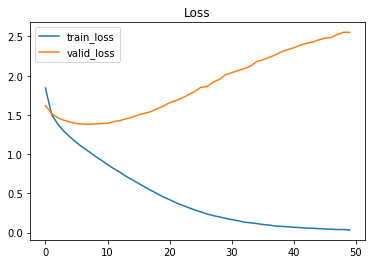

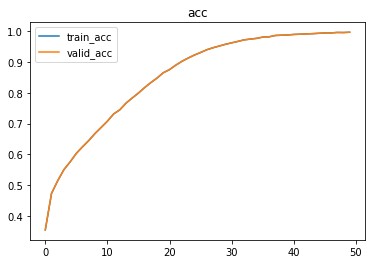

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

plt.plot(range(len(train_loss)),train_loss,label='train_loss')
plt.plot(range(len(valid_loss)),valid_loss,label='valid_loss')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)),train_acc,label='train_acc')
plt.plot(range(len(valid_acc)),valid_acc,label='valid_acc')
plt.legend()
plt.title("acc")
plt.show()


In [69]:
from keras.layers import BatchNormalization
"""Code Here
    建立你的神經網路
    """
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i,n_units in enumerate(num_neurons):
        if i == 0:
            
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        
        else:
            
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [70]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 128
MOMENTUM = 0.95

In [71]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE,nesterov=True,momentum=MOMENTUM)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)

model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),shuffle=True)

train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
train_acc = model.history.history['acc']
valid_acc = model.history.history['acc']

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_83 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_84 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_85 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 15s 296us/step - loss: 0.2708 - acc: 0.9067 - val_loss: 2.4058 - val_acc: 0.4613
Epoch 50/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.2596 - acc: 0.9116 - val_loss: 2.5520 - val_acc: 0.4607


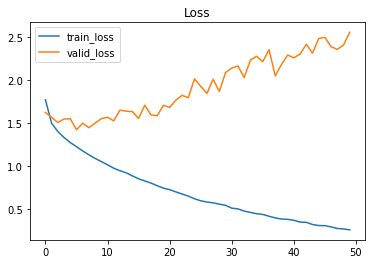

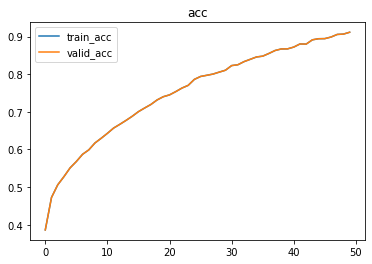

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

plt.plot(range(len(train_loss)),train_loss,label='train_loss')
plt.plot(range(len(valid_loss)),valid_loss,label='valid_loss')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)),train_acc,label='train_acc')
plt.plot(range(len(valid_acc)),valid_acc,label='valid_acc')
plt.legend()
plt.title("acc")
plt.show()

In [73]:
from keras.layers import BatchNormalization
"""Code Here
    建立你的神經網路
    """
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i,n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
            
        
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
            
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [74]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 128
MOMENTUM = 0.95

In [76]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE,nesterov=True,momentum=MOMENTUM)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)

model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),shuffle=True)

train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
train_acc = model.history.history['acc']
valid_acc = model.history.history['acc']

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
batch_normalization_89 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_90 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_91 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________

50000/50000 [==============================] - 13s 255us/step - loss: 0.0580 - acc: 0.9841 - val_loss: 2.6427 - val_acc: 0.5091
Epoch 50/50
50000/50000 [==============================] - 13s 254us/step - loss: 0.0546 - acc: 0.9851 - val_loss: 2.6635 - val_acc: 0.5146


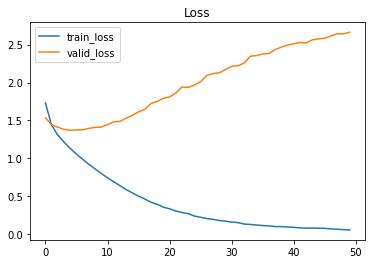

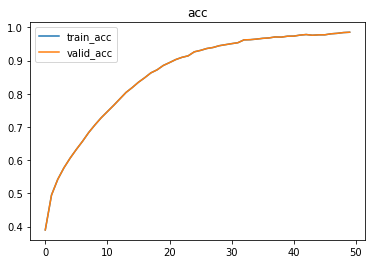

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

plt.plot(range(len(train_loss)),train_loss,label='train_loss')
plt.plot(range(len(valid_loss)),valid_loss,label='valid_loss')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)),train_acc,label='train_acc')
plt.plot(range(len(valid_acc)),valid_acc,label='valid_acc')
plt.legend()
plt.title("acc")
plt.show()